In [1]:
import numpy
import scipy.stats
import seaborn

#seaborn.set_context('talk')

# Distribución de estadísticos, TCL

## Generación de datos

1. Generamos 1 realización de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución conocida (mejor no normal). Por ejemplo: Poisson. Graficar la distribución de la muestra.

2. Luego tenemos 1 realización del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.



promedio de la muestra= 5.074 , una realización del estadístico media muestral


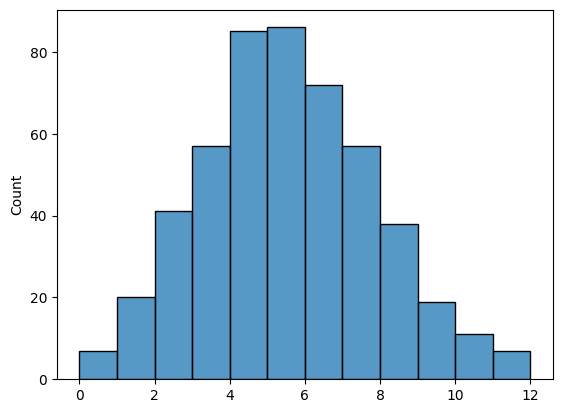

In [14]:
# Generación de muestras de una distribución Poisson

n = 500

lambd = 5

sample = scipy.stats.poisson.rvs(lambd, size=n) #realización de una muestra aleatoria X_1,  ... X_n (de tamaño n)

seaborn.histplot(sample, bins=12)
print ('promedio de la muestra=', sample.mean(), ', una realización del estadístico media muestral')


1. Generamos m realizaciones de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución no normal. Por ejemplo: Poisson. Elegir una realización y graficar la distribución de la muestra.

2. Luego tendríamos N realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.

Graficar la distribución de estas realizaciones (de las medias muestrales). ¿Se parece a una distribución normal?

promedio de la muestra= 5.00219


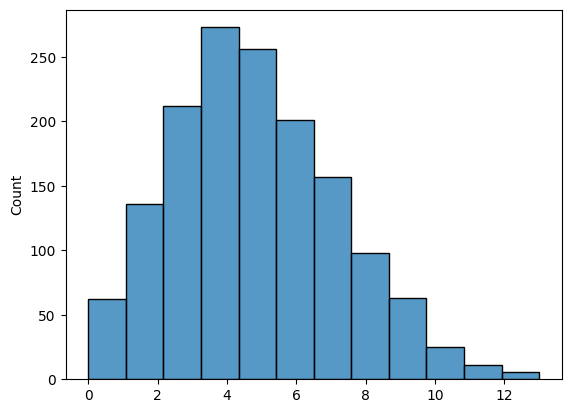

In [21]:
# Generación de muestras de una distribución poisson

m = 400 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 1500

lambd = 5
i=9
samples = scipy.stats.poisson.rvs(lambd, size=(m, n))
seaborn.histplot(samples[i], bins=12)
print ('promedio de la muestra=', samples.mean())


In [48]:
# Generación de muestras de una distribución exponencial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
l = 5
s = 2
# media=l+s
# varianza=s^2
m = 50_000 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 2000
samples = scipy.stats.expon.rvs(loc=l,scale=s,size=(m, n))
print ('promedio de la muestra=', samples.mean())

promedio de la muestra= 7.000206608103283


[5.06857924 5.83555116 5.60403436 9.43639335] ... [ 8.28656719  5.19353506 10.20422485  6.702637  ]
media=  7.032585771307313


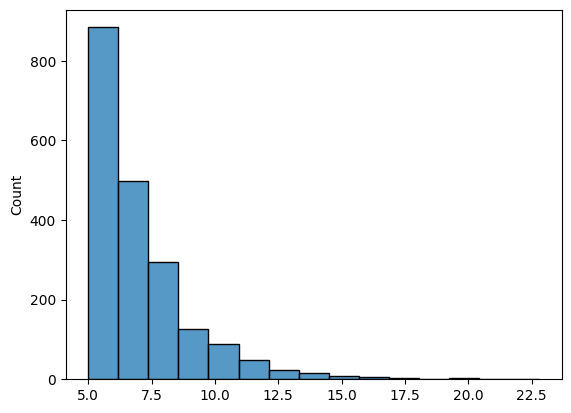

In [49]:
#primera realización de la m.a.
print(samples[0][:4],'...', samples[0][-5:-1])

# Histograma de la i-ésima realización de la muestra
i=9
#seaborn.countplot(samples[i])
seaborn.histplot(samples[i], bins=15)
print('media= ', samples[i].mean())

In [50]:
alpha = 0.05
z_0975 = 1.96
media=samples[i].mean()
std=samples[i].std()
estadistico_liminf =media-(std*z_0975/numpy.sqrt(n))
estadistico_limsup =media+(std*z_0975/numpy.sqrt(n))
print(estadistico_liminf,estadistico_limsup)
print(estadistico_limsup-estadistico_liminf)

6.941536543960251 7.123634998654375
0.182098454694124


In [51]:
# Calculamos la media para cada una de las muestras.
sample_means = samples.mean(axis=1) #media de cada fila, tendremos m medias
sample_means.shape

(50000,)

Veamos la distribución de las m realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$

Media de medias = 7.000206608103297
Varianza de medias = 0.001995155297967081


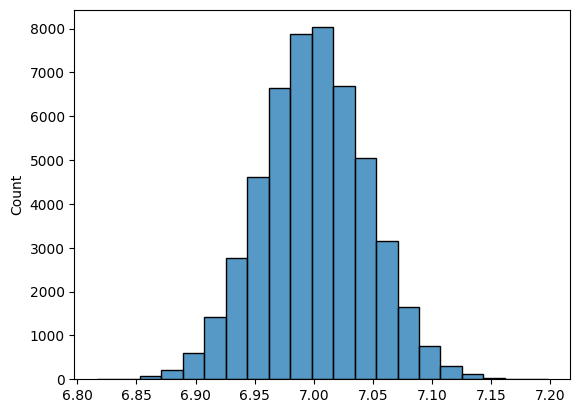

In [52]:
seaborn.histplot(sample_means, bins=21)
print('Media de medias =', sample_means. mean())
print('Varianza de medias =', sample_means. var())

In [53]:
# documentación de la función norm de scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Estima la media y el desvío (los parámetros de una normal)
media, std = scipy.stats.norm.fit(sample_means)
media, std, std**2

(7.000206608103297, 0.044667161292912726, 0.001995155297967081)

## Ejercicio 1

1. Analizar qué pasa cuando crece $n$ y ver la distribución de $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ cuando $n\rightarrow \infty$ (el tamaño de la muestra). ¿Qué sucede con la varianza?

2. Realizar el mismo análisis con otra distribución no normal, por ejemplo, exponencial.

# Estimación puntual y por intervalos


## Ejercicio 2: Estimadores puntuales y por intervalos (para practicar luego)
0. Fijar n=700
1. Dar un estimador puntual de la media de la distribución generada

2. Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.
3. Dar m=1000 realizaciones del **intervalo de confianza** para **la media** de nivel 0.95 y contar cuantos contienen a **la media** verdadera.
4. Incrementar n=4000 (por 4) y repetir el paso 2. Qué le pasó a la longitud el IC ?


##  Ejercicio 3: Estimadores puntuales y por intervalos sobre  la variable salario bruto y neto

1.  Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha) de la variable media del salario, calcular la longitud del intervalo.
2. Rehacer sacando los outliers (cero y 4.5 millon)
3. calcular intervalos para el salario neto.

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

#seaborn.set_context('talk')
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
salary_col2='salary_monthly_NETO'


#filtered_df= df[df[salary_col] < 2500000]
#filtered_df= filtered_df[filtered_df[salary_col] > 0]

In [ ]:
n=len(df[salary_col])
alpha = 0.05
z_0975 = 1.96

In [ ]:
media=np.mean(df[salary_col])
std = np.std(df[salary_col])



In [ ]:
estadistico_liminf =media-(std*z_0975/np.sqrt(n))
estadistico_limsup =media+(std*z_0975/np.sqrt(n))
print(estadistico_liminf,estadistico_limsup)
print(estadistico_limsup-estadistico_liminf)

669658.52905998 718666.751690063
49008.222630083095
